In [140]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
#from nltk.corpus import stopwords
import matplotlib.pyplot as plt

import os



In [141]:
PATH = os.getcwd()

In [142]:
PATH

'c:\\Users\\MoAly\\OneDrive - Rihal\\Rihal\\Projects\\RihalIntern'

In [143]:
try:
    os.mkdir(PATH + '/graphs')
except:
    pass

In [233]:
try:
    os.mkdir(PATH + '/tokenizers')
except:
    pass

In [234]:
try:
    os.mkdir(PATH + '/models')
except:
    pass

In [144]:
data = pd.read_csv(PATH + '/data/Stress.csv')
data.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [145]:
def filtter(text):
    filtered_text = ''
    for char in text:
        if char not in ['/', '%', '&', '#', '@','.',',']: 
            filtered_text += char

    return filtered_text

In [146]:
filtter('%text') #To test the Function

'text'

In [147]:
data['text'].isna().sum()

0

In [148]:
data['label'].isna().sum()

0

In [149]:
data['text'] = [str(text) for text in data['text']]

In [150]:
data['text'] = [filtter(text) for text in data['text']]

In [151]:
data['text'] = [text.lower() for text in data['text']]

In [152]:
data.shape

(2838, 116)

In [153]:
set(data['label']) #To insure if the data is clean

{0, 1}

In [154]:
data.isna().values.sum() #There is no Null values

0

In [155]:
categories = set(data['subreddit']) 

In [156]:
data.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)",he said he had not felt that way before sugget...,33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)",hey there rassistance not sure if this is the ...,2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",my mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]",until i met my new boyfriend he is amazing he ...,239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",october is domestic violence awareness month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [157]:
from random import randint

In [158]:
def counting_summation_per_category(data = data ,categories = categories):
    
    analytical_table = {
        'Categories': [],
        'Total posts' : [],
        'Number of Positive posts' : [],
        'Ratio' : []
    }

    for cat in categories:
        temp_data = data[data['subreddit'] == cat]
        total_len = len(temp_data)
        temp_data_positive = temp_data[temp_data['label'] == 1]
        positive_len = len(temp_data_positive)
        ratio_of_stress = (positive_len / total_len) * 100
        print(f"{cat} having {ratio_of_stress} % of labeld data")
        print("_____________________________________________________")
        analytical_table['Categories'].append(str(cat))
        analytical_table['Total posts'].append(int(total_len))
        analytical_table['Number of Positive posts'].append(int(positive_len))
        analytical_table['Ratio'].append(float(ratio_of_stress))

    analytical_dataframe = pd.DataFrame(analytical_table)
    analytical_dataframe = analytical_dataframe.sort_values(by= 'Ratio')

    plt.bar(analytical_dataframe['Categories'], analytical_dataframe['Ratio'])
    plt.xlabel("categories")
    plt.ylabel("Ratio of stress postes")
    plt.title("Strees level per Category")
    plt.figure(figsize=(19.2,10.8))
    try:
        plt.savefig(PATH + '/graphs/counting_summation_per_category.png')
    except:
        name = str(randint)
        plt.savefig(PATH + f'/graphs/{name}')
    return plt.show()




relationships having 44.7463768115942 % of labeld data
_____________________________________________________
homeless having 37.5 % of labeld data
_____________________________________________________
stress having 54.6875 % of labeld data
_____________________________________________________
anxiety having 65.8051689860835 % of labeld data
_____________________________________________________
food_pantry having 37.83783783783784 % of labeld data
_____________________________________________________
domesticviolence having 63.92405063291139 % of labeld data
_____________________________________________________
assistance having 36.332179930795846 % of labeld data
_____________________________________________________
survivorsofabuse having 45.714285714285715 % of labeld data
_____________________________________________________
almosthomeless having 58.75 % of labeld data
_____________________________________________________
ptsd having 56.849315068493155 % of labeld data
_____________

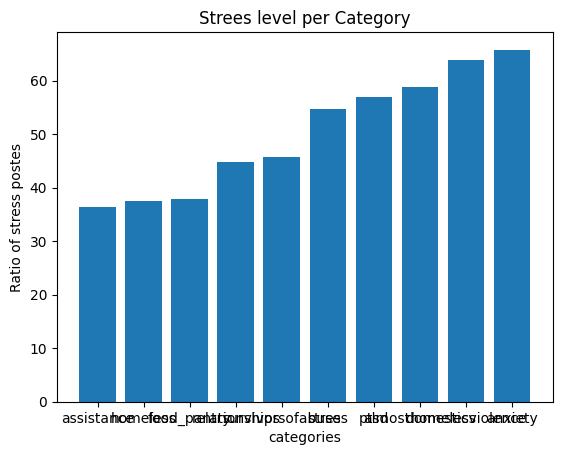

<Figure size 1920x1080 with 0 Axes>

In [159]:
counting_summation_per_category()

In [160]:
stopwordsfile = open(PATH + '//Data//english', "r")

In [161]:
stopwords = stopwordsfile.read()

In [162]:
stopwords

"i\nme\nmy\nmyself\nwe\nour\nours\nourselves\nyou\nyou're\nyou've\nyou'll\nyou'd\nyour\nyours\nyourself\nyourselves\nhe\nhim\nhis\nhimself\nshe\nshe's\nher\nhers\nherself\nit\nit's\nits\nitself\nthey\nthem\ntheir\ntheirs\nthemselves\nwhat\nwhich\nwho\nwhom\nthis\nthat\nthat'll\nthese\nthose\nam\nis\nare\nwas\nwere\nbe\nbeen\nbeing\nhave\nhas\nhad\nhaving\ndo\ndoes\ndid\ndoing\na\nan\nthe\nand\nbut\nif\nor\nbecause\nas\nuntil\nwhile\nof\nat\nby\nfor\nwith\nabout\nagainst\nbetween\ninto\nthrough\nduring\nbefore\nafter\nabove\nbelow\nto\nfrom\nup\ndown\nin\nout\non\noff\nover\nunder\nagain\nfurther\nthen\nonce\nhere\nthere\nwhen\nwhere\nwhy\nhow\nall\nany\nboth\neach\nfew\nmore\nmost\nother\nsome\nsuch\nno\nnor\nnot\nonly\nown\nsame\nso\nthan\ntoo\nvery\ns\nt\ncan\nwill\njust\ndon\ndon't\nshould\nshould've\nnow\nd\nll\nm\no\nre\nve\ny\nain\naren\naren't\ncouldn\ncouldn't\ndidn\ndidn't\ndoesn\ndoesn't\nhadn\nhadn't\nhasn\nhasn't\nhaven\nhaven't\nisn\nisn't\nma\nmightn\nmightn't\nmustn\nmus

In [163]:
X = data['text']
y = data['label']

In [164]:
X.head()

0    he said he had not felt that way before sugget...
1    hey there rassistance not sure if this is the ...
2    my mom then hit me with the newspaper and it s...
3    until i met my new boyfriend he is amazing he ...
4    october is domestic violence awareness month a...
Name: text, dtype: object

In [165]:
X

0       he said he had not felt that way before sugget...
1       hey there rassistance not sure if this is the ...
2       my mom then hit me with the newspaper and it s...
3       until i met my new boyfriend he is amazing he ...
4       october is domestic violence awareness month a...
                              ...                        
2833    * her a week ago: precious how are you? (i ign...
2834    i don't have the ability to cope with it anymo...
2835    in case this is the first time you're reading ...
2836    do you find this normal? they have a good rela...
2837    i was talking to my mom this morning and she s...
Name: text, Length: 2838, dtype: object

In [166]:
for text in X:
    text = text.lower()


In [167]:
for text in X:
    text = filtter(text)

In [168]:
def stopword_exclude(text, stopwords = stopwords):
    text = text.lower()
    words = text.split()  # Tokenize the text into words
    filtered_text = [word for word in words if word not in stopwords]
    
    return ' '.join(filtered_text)  # Joining words back into a string

        

In [169]:
temp = []


for text in X:
    temp.append(stopword_exclude(text))

    
X = pd.Series(temp)

In [170]:
X.shape

(2838,)

In [171]:
y.shape

(2838,)

In [172]:
X.head()

0    said felt way suggeted go rest trigger ahead y...
1    rassistance sure right place post goes =) i'm ...
2    mom hit newspaper shocked knows like play hitt...
3    met new boyfriend amazing kind sweet good stud...
4    october domestic violence awareness month dome...
dtype: object

In [ ]:
tfidf_vectorizer = TfidfVectorizer()

In [193]:
X = tfidf_vectorizer.fit_transform(X)

In [194]:
from sklearn.model_selection import train_test_split


In [195]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=10)

In [210]:
#from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier



In [197]:
model = SVC()

In [198]:

X_train

<1986x11817 sparse matrix of type '<class 'numpy.float64'>'
	with 70521 stored elements in Compressed Sparse Row format>

In [199]:
y_train

450     0
2551    0
1529    0
343     1
2590    1
       ..
2009    0
1180    0
1344    0
527     1
1289    0
Name: label, Length: 1986, dtype: int64

<1986x9826 sparse matrix of type '<class 'numpy.float64'>'
	with 70521 stored elements in Compressed Sparse Row format>

450     gave birth beautiful baby girl nov 2017 partne...
2551    check rkratom info personally swear edit: seem...
1529    sometimes feel bad see freak flashbacks black ...
343     play really loud music speaker got bad threw l...
2590    fucking kidding me? comfortable writing someth...
                              ...                        
2009    nevertheless looks like someone like friends i...
1180    brief background bullet points go weird go det...
1344    bring - trying pawn others eventually bring ho...
527     already months advice ifhow improve cut loses ...
1289    i'm guy 13 started talking girl online forum q...
Length: 1986, dtype: object

In [200]:
model.fit(X_train,y_train)

SVC()

In [201]:
sample_text = ["I feel stress because of having lot's of assignments in the collage and I have no time and my gpa is lower then 2"]
sample_text_tokenized = tfidf_vectorizer.transform(sample_text)
prediction = model.predict(sample_text_tokenized.toarray())

prediction_label = "Stressed" if prediction[0] == 1 else "Not Stressed"

prediction_label


'Not Stressed'

In [202]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score


In [203]:


y_pred = model.predict(X_test)

In [204]:
precision = precision_score(y_test, y_pred)
precision

0.7222222222222222

In [205]:
recall = recall_score(y_test, y_pred)
recall

0.7788018433179723

In [206]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7347417840375586

In [211]:
from sklearn.ensemble import BaggingClassifier


In [226]:
base_classifier = LogisticRegression(solver = 'sag')


In [227]:
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)


In [228]:
bagging_classifier.fit(X_train, y_train)


BaggingClassifier(estimator=LogisticRegression(solver='sag'), random_state=42)

In [229]:
y_pred = bagging_classifier.predict(X_test)


In [230]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7253521126760564

In [231]:
precision = precision_score(y_test, y_pred)
precision

0.711864406779661

In [232]:
recall = recall_score(y_test, y_pred)
recall

0.7741935483870968

In [235]:
from joblib import dump


In [238]:
dump(tfidf_vectorizer, PATH + '\\tokenizers\\tfidf_vectorizer.joblib') #Save the Tokenizer for Deployment


['c:\\Users\\MoAly\\OneDrive - Rihal\\Rihal\\Projects\\RihalIntern\\tokenizers\\tfidf_vectorizer.joblib']

In [239]:
dump(bagging_classifier,PATH + '\\models\\bagging_classifier.joblib') #Save the model for Deployment


['c:\\Users\\MoAly\\OneDrive - Rihal\\Rihal\\Projects\\RihalIntern\\tokenizers\\bagging_classifier.joblib']

In [ ]:
import tensorflow as tf
from keras.callbacks import EarlyStopping

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# Initializing the TfidfVectorizer
tfidf = TfidfVectorizer()

# Transforming the 'text' column using the vectorizer
x = tfidf.fit_transform(data['text'])

# Getting the 'label' column values
y = data['label'].values

# Checking the shapes of the transformed data
x.shape, y.shape


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y , test_size= 0.2, random_state= 40)
early_stopper = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [ ]:
nn = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(1000, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(500, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

In [ ]:
precision_metric = tf.keras.metrics.Precision()
nn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy', precision_metric])

In [ ]:
nn.summary()

In [ ]:
nn.fit(X_train.toarray(), y_train, epochs=100, batch_size=8, validation_data=(X_test.toarray(), y_test), callbacks=[early_stopper])


In [ ]:
reasults = nn.evaluate(X_test.toarray(), y_test)


In [ ]:
print(f"Test Loss: {reasults[0]:.4f}")
print(f"Test Accuracy: {reasults[1]:.4f}")

In [ ]:
sample_text = ["I feel so much stress because of having lots of assignments in the collage and I have no time and my gpa is lower then 2"]
sample_text_tfidf = tfidf.transform(sample_text)
prediction = nn.predict(sample_text_tfidf.toarray())
prediction[0][0]

In [ ]:
import os
checkpoint_path = "training/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [ ]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
nn.fit(X_train.toarray(), y_train, epochs=10, batch_size=64, validation_data=(X_test.toarray(), y_test), callbacks=[early_stopper, cp_callback])

In [ ]:
os.listdir(checkpoint_dir)


In [ ]:
tf.keras.models.save_model(nn, "training/stress.h5")